In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2019-09-23 11:54:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2019-09-23 11:54:23 (134 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print("Total words = ", total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
    
## Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen = max_sequence_len,
                                         padding = 'pre'))

## Create predictors and labels
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels,
                                   num_classes = total_words)

In [6]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [7]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [8]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [9]:
print(xs[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]


In [10]:
print(ys[5])

[0. 0. 0. ... 0. 0. 0.]


In [12]:
model = Sequential()
model.add(Embedding(total_words, 100,
                    input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))

adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

history = model.fit(xs, ys,
                    epochs = 100,
                    verbose = 1)

Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 30s 2ms/sample - loss: 6.6465 - accuracy: 0.0731
Epoch 2/100
12038/12038 [==============================] - 28s 2ms/sample - loss: 5.7608 - accuracy: 0.1107
Epoch 3/100
12038/12038 [==============================] - 28s 2ms/sample - loss: 4.8579 - accuracy: 0.1645
Epoch 4/100
12038/12038 [==============================] - 28s 2ms/sample - loss: 3.9050 - accuracy: 0.2413
Epoch 5/100
12038/12038 [==============================] - 28s 2ms/sample - loss: 3.0995 - accuracy: 0.3389
Epoch 6/100
12038/12038 [==============================] - 28s 2ms/sample - loss: 2.3795 - accuracy: 0.4652
Epoch 7/100
12038/12038 [==============================] - 28s 2ms/sample - loss: 1.8895 - accuracy: 0.5541
Epoch 8/100
12038/12038 [==============================] - 27s 2ms/sample - loss: 1.6094 - accuracy: 0.6178
Epoch 9/100
12038/12038 [==============================] - 27s 2ms/sample - loss: 1.3288 - accuracy: 0.6791
Epoch

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

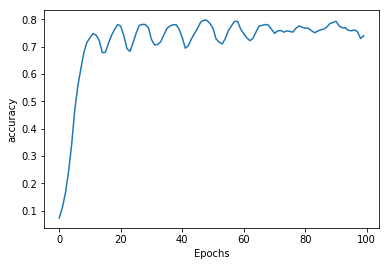

In [15]:
plot_graphs(history, 'accuracy')

In [17]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],
                             maxlen = max_sequence_len - 1,
                             padding = 'pre')
  predicted = model.predict_classes(token_list,
                                    verbose = 0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
  
print(seed_text)

I've got a bad feeling about this time for a brothers and how do his lip look so queer on the stile mary where we sat side side by side by side by side by side sure twas it fingers and guns and piety gave em to molly while pistols again for erin a little town they would neer again for instead on ye with blue isle from hill and tenderest teacher to day please again for this old love are rest on again for erin go bragh with snow bent the sky wrath that love away on the broad majestic shannon on wid so fondly today
